In [1]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163340 sha256=d9bf2f091fe78975672de968cd28905c61026f7c6741bd7b6847f7263b32785b
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNBasic, KNNBaseline
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [3]:
#Load Movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [6]:
#Variables for algorithms
algo_svd = SVD()
algo_svdpp = SVDpp()
algo_nmf = NMF()
algo_knnbasic = KNNBasic()
algo_knnbaseline = KNNBaseline()

In [7]:
#Cross-validation
cv_svd = cross_validate(algo_svd, data, measures=["rmse"], cv=4, verbose=True)
cv_svdpp = cross_validate(algo_svdpp, data, measures=["rmse"], cv=4, verbose=True)
cv_nmf = cross_validate(algo_nmf, data, measures=["rmse"], cv=4, verbose=True)
cv_knnbasic = cross_validate(algo_knnbasic, data, measures=["rmse"], cv=4, verbose=True)
cv_knnbaseline = cross_validate(algo_knnbaseline, data, measures=["rmse"], cv=4, verbose=True)

Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9390  0.9376  0.9380  0.9448  0.9398  0.0029  
Fit time          1.99    1.33    1.38    1.36    1.51    0.27    
Test time         0.18    0.25    0.28    0.17    0.22    0.05    
Evaluating RMSE of algorithm SVDpp on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9220  0.9212  0.9316  0.9141  0.9222  0.0062  
Fit time          23.83   23.95   24.49   24.09   24.09   0.25    
Test time         6.30    5.45    5.28    6.06    5.77    0.42    
Evaluating RMSE of algorithm NMF on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9686  0.9676  0.9665  0.9614  0.9660  0.0028  
Fit time          2.10    2.13    2.13    2.79    2.29    0.29    
Test time         0.25    0.24    0.15    0.26    0.22    0.05    
Computing the msd similarity matrix...
Done com

In [9]:
#Find mean of RMSE
rmse_svd = cv_svd['test_rmse'].mean()
rmse_svdpp = cv_svdpp['test_rmse'].mean()
rmse_nmf = cv_nmf['test_rmse'].mean()
rmse_knnbasic = cv_knnbasic['test_rmse'].mean()
rmse_knnbaseline = cv_knnbaseline['test_rmse'].mean()

print(f"SVD = {rmse_svd}")
print(f"SVDpp = {rmse_svdpp}")
print(f"NMF = {rmse_nmf}")
print(f"KNNBasic = {rmse_knnbasic}")
print(f"KNNBaseline = {rmse_knnbaseline}")

SVD = 0.9398386430069274
SVDpp = 0.9222285961945886
NMF = 0.9660465503708713
KNNBasic = 0.9821415207263677
KNNBaseline = 0.9322494567491699


Висновок: серед усіх п’яти середніх значень результатів найнижчий RMSE має SVDpp, що означає, що цей алгоритм є найбільш оптимальним для набору даних Movielens.

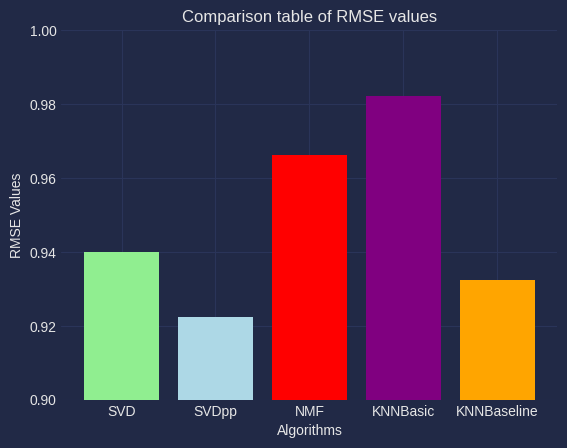

In [10]:
rmse_variables = [rmse_svd, rmse_svdpp, rmse_nmf, rmse_knnbasic, rmse_knnbaseline]
algos = ["SVD", "SVDpp", "NMF", "KNNBasic", "KNNBaseline"]
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.bar(algos, rmse_variables, color=['lightgreen', 'lightblue', 'red', 'purple', 'orange'])
plt.title("Comparison table of RMSE values")
plt.xlabel("Algorithms")
plt.ylabel("RMSE Values")
plt.ylim(0.9, 1.0)
plt.show()

Висновок: на практичній роботі я поглибив знання з мови програмування Python, використовуючи бібліотеку "surprise". Протягом роботи я виконував різні завдання, зокрема завантажував датасети та алгоритми, знаходив середньоквадратичну похибку встановлених алгоритмів.